In [125]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# CL1

# HIBP

In [92]:
with open('results/split_mnist_res5_hibp_l2_cifar10_a20.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()
# alpha0=20, alpha=4

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [93]:
with open('results/split_mnist_res5_hibp_lr_bl250_a20.pkl', 'rb') as input_file:
    d_new = pickle.load(input_file)
d_new.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [94]:
with open('results/split_mnist_res5_ibp_rs_split_cifar10_cifar10_rs.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [95]:
with open('results/split_mnist_res5_cifar10_hibp_l2_a20_a10.pkl', 'rb') as input_file:
    d_new_new = pickle.load(input_file)
d_new_new.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [96]:
d_new_new['vcl_baselines'].keys()

dict_keys([100, 400])

In [97]:
d_rs['opt_params']

{'learning_rate': 0.000307922843224937,
 'alpha0': 14.02133822197403,
 'lambda_1': 0.7950063904725675,
 'lambda_2': 0.7978261040069441,
 'prior_var': 0.23533123829384986,
 'alpha': 46.25930781356598,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 128.0,
 'beta0': 1.0}

In [98]:
d['vcl_baselines'].keys()

dict_keys([20, 200])

In [99]:
d_new['vcl_baselines'].keys()

dict_keys([250])

In [100]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
hibp_acc_new = d_new['vcl_ibp']
hibp_acc_rs = d_rs['vcl_ibp'] # 5, 5, 5
hibp_acc_new_new = d_new_new['vcl_ibp']
vcl_result_h20 = d['vcl_baselines'][20]
vcl_result_h100 = d_new_new['vcl_baselines'][100]
vcl_result_h200 = d['vcl_baselines'][200]
vcl_result_h250 = d_new['vcl_baselines'][250]
vcl_result_h400 = d_new_new['vcl_baselines'][400]
_hibp_acc = np.mean(hibp_acc, 0)
_hibp_acc_new = np.mean(hibp_acc_new, 0)
_hibp_acc_rs = np.mean(hibp_acc_rs, 0)
_hibp_acc_new_new = np.mean(hibp_acc_new_new, 0)
_vcl_result_h20 = np.mean(vcl_result_h20, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h200 = np.mean(vcl_result_h200, 0)
_vcl_result_h250 = np.mean(vcl_result_h250, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__hibp_acc_new = np.nanmean(hibp_acc_new, (0,1))
__hibp_acc_rs = np.nanmean(hibp_acc_rs, (0,1))
__hibp_acc_new_new = np.nanmean(hibp_acc_new_new, (0,1))
__vcl_result_h20 = np.nanmean(vcl_result_h20, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h200 = np.nanmean(vcl_result_h200, (0,1))
__vcl_result_h250 = np.nanmean(vcl_result_h250, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

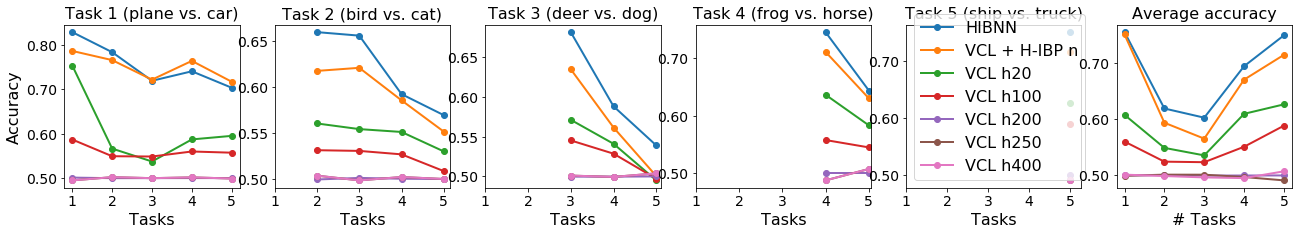

In [101]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='HIBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc_new_new[:, i], label='VCL + H-IBP n', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h20[:, i]))+1, _vcl_result_h20[:, i], label='VCL h20', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h200[:, i]))+1, _vcl_result_h200[:, i], label='VCL h200', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h250[:, i]))+1, _vcl_result_h250[:, i], label='VCL h250', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h250[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc_new_new, label='VCL + H-IBP n', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h20, label='VCL 20', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h200, label='VCL 200', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h250, label='VCL 250', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_hibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_hibp_cifar_mh_l1.pdf", bbox_inches='tight')
fig.show()

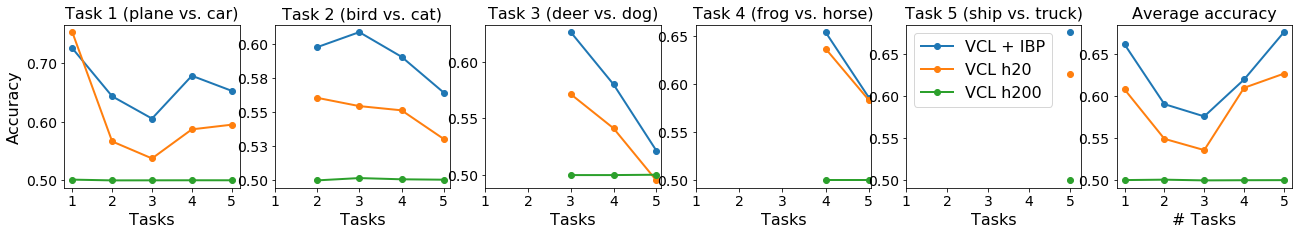

In [102]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc_new[:, i]))+1, _hibp_acc_new[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h20[:, i]))+1, _vcl_result_h20[:, i], label='VCL h20', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h200[:, i]))+1, _vcl_result_h200[:, i], label='VCL h200', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc_new))+1, __hibp_acc_new, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc_new))+1, __vcl_result_h20, label='VCL 20', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc_new))+1, __vcl_result_h200, label='VCL 200', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_hibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_hibp_cifar_mh_l1.pdf", bbox_inches='tight')
fig.show()

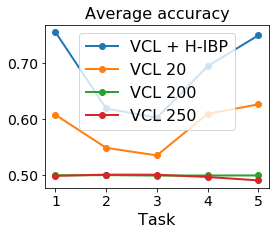

In [103]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax.plot(np.arange(len(__hibp_acc))+1, __vcl_result_h20, label='VCL 20', marker='o', linewidth=lw)
ax.plot(np.arange(len(__hibp_acc))+1, __vcl_result_h200, label='VCL 200', marker='o', linewidth=lw)
ax.plot(np.arange(len(__hibp_acc))+1, __vcl_result_h250, label='VCL 250', marker='o', linewidth=lw)
ax.set_xticks(range(1, len(_hibp_acc)+1))
ax.set_title('Average accuracy', fontsize=legend_size)
ax.set_xlabel('Task', fontsize=legend_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.legend(fontsize=legend_size)
plt.savefig("plots/accs_hibp_cifar_mh_l2.pdf", bbox_inches='tight')
fig.show()

In [104]:
print("Overall accuracies HIBP: {0} pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies HIBP new: {0} pm {1}".format(np.nanmean(hibp_acc_new), np.nanmean(np.nanstd(hibp_acc_new, 0))))
print("Overall accuracies HIBP new new: {0} pm {1}".format(np.nanmean(hibp_acc_new_new), np.nanmean(np.nanstd(hibp_acc_new_new, 0))))
print("Overall accuracies HIBP RS: {0} pm {1}".format(np.nanmean(hibp_acc_rs), np.nanmean(np.nanstd(hibp_acc_rs, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h200: {0} pm {1}".format(np.nanmean(vcl_result_h200), np.nanmean(np.nanstd(vcl_result_h200, 0))))
print("Overall accuracies VCL h250: {0} pm {1}".format(np.nanmean(vcl_result_h250), np.nanmean(np.nanstd(vcl_result_h250, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h250), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies HIBP: 0.68016 pm 0.03864862079280764
Overall accuracies HIBP new: 0.6208323694268862 pm 0.05528749997123566
Overall accuracies HIBP new new: 0.6590276688088973 pm 0.019929303601600078
Overall accuracies HIBP RS: 0.6569216149765998 pm 0.03248069842404774
Overall accuracies VCL h20: 0.5793733333333333 pm 0.0784269136673902
Overall accuracies VCL h100: 0.5793733333333333 pm 0.0784269136673902
Overall accuracies VCL h200: 0.5001933333333334 pm 0.00040218035409129733
Overall accuracies VCL h250: 0.4995622773127009 pm 0.008712403498117966
Overall accuracies VCL h400: 0.4995622773127009 pm 0.01057686753662637


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [24]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

In [25]:
Z_hibp = d['Z']
len(Z_hibp)

5

In [32]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp[i][j])
    _Z_hibp.append(tmp)

In [33]:
len(_Z_hibp)

10

In [34]:
__Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp[0].shape

(5, 2000, 200)

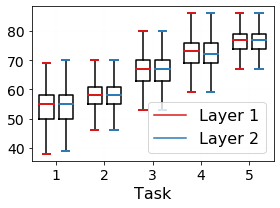

In [55]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
#plt.ylabel()
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=legend_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_cifar_hibp_l2.pdf', bbox_inches='tight')
plt.show()

# IBP

In [105]:
with open('results/split_mnist_res5_ibp_l2_cifar10_a20.pkl', 'rb') as input_file:
    d_ibp = pickle.load(input_file)
d_ibp.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [106]:
ibp_acc = d_ibp['vcl_ibp'] # 5, 5, 5
# vcl_result_h20 = d['vcl_baselines'][20]
# vcl_result_h200 = d['vcl_baselines'][200]
_ibp_acc = np.mean(ibp_acc, 0)
# _vcl_result_h20 = np.mean(vcl_result_h20, 0)
# _vcl_result_h200 = np.mean(vcl_result_h200, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
# __vcl_result_h20 = np.nanmean(vcl_result_h20, (0,1))
# __vcl_result_h200 = np.nanmean(vcl_result_h200, (0,1))

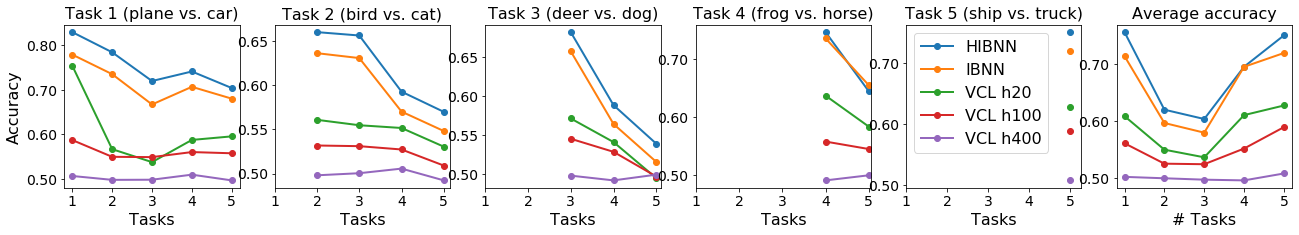

In [111]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='HIBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h20[:, i]))+1, _vcl_result_h20[:, i], label='VCL h20', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='HIBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h20, label='VCL h20', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL h400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_hibp_cifar_mh_l2.pdf", bbox_inches='tight')
fig.show()

In [110]:
print("Overall accuracies HIBP: {0} pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h250), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies HIBP: 0.68016 pm 0.03864862079280764
Overall accuracies IBP: 0.6530359631364505 pm 0.033140493793019456
Overall accuracies VCL h20: 0.5793733333333333 pm 0.0784269136673902
Overall accuracies VCL h100: 0.5441955207269469 pm 0.06482666400549066
Overall accuracies VCL h400: 0.4995622773127009 pm 0.01057686753662637


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


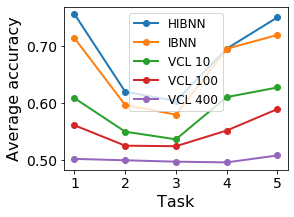

In [109]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='HIBNN', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h20, label='VCL 10', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax.set_xticks(range(1, len(_ibp_acc)+1))
ax.set_ylabel('Average accuracy', fontsize=legend_size)
ax.set_xlabel('Task', fontsize=legend_size)
#ax.set_ylim([0.2, 0.8])
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.legend(fontsize=12)
plt.savefig("plots/accs_hibp_ibp_cifar_mh_l2.pdf", bbox_inches='tight')
fig.show()

In [28]:
Z_ibp = d_ibp['Z']
len(Z_ibp)

5

In [29]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [30]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2000, 200)

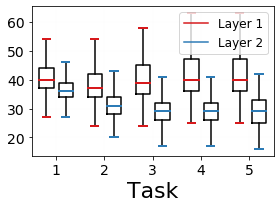

In [80]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_cifar_ibp_l2.pdf', bbox_inches='tight')
plt.show()

## Plot for paper

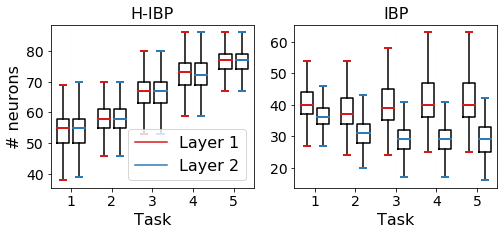

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpl = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
ax[0].plot([], c='#D7191C', label='Layer 1')
ax[0].plot([], c='#2C7BB6', label='Layer 2')
ax[0].legend(fontsize=legend_size)

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(40, 90, 10))
ax[1].set_yticks(range(20, 70, 10))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
ax[0].set_title('H-IBP', fontsize=legend_size)
ax[1].set_title('IBP', fontsize=legend_size)
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.savefig('plots/Zs_bp_cifar_hibp_ibp_l2.pdf', bbox_inches='tight')
plt.show()

# CL2

In [151]:
with open('results/split_mnist_res5_ibp_rs_split_cifar10_hibp_l2_cifar10_sh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [152]:
d_rs['opt_params']

{'learning_rate': 0.0003401352891114431,
 'alpha0': 45.19096780461374,
 'lambda': 0.7921084028923031,
 'prior_var': 0.5342531520679689,
 'alpha': 22.32723878618031,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 128.0,
 'beta0': 1.0}

In [153]:
#Args:
# difficult            = False
# single_head          = True
# num_layers           = 2
# runs                 = 5
# alpha0               = 20.0
# log_dir              = 'logs_cifar'
# dataset              = 'cifar10'
# use_local_reparam    = False
# implicit_beta        = True
# hibp                 = True
# run_baselines        = True
# h_list               = [20, 100, 400]
# cl3                  = False
# K                    = 200
# tag                  = 'cifar10_sh'
# beta_hack            = [1, 1, 1, 1, 1]
# alpha                = 4
# no_ibp               = False
with open('results/split_mnist_res5_cifar10_sh.pkl', 'rb') as input_file:
    d_bl = pickle.load(input_file)
d_bl.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [154]:
d_bl['vcl_baselines'].keys()

dict_keys([20, 100, 400])

In [155]:
with open('results/split_mnist_res5_ibp_sh_c10_a20.pkl', 'rb') as input_file:
    d_ibp = pickle.load(input_file)
d_ibp.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [156]:
d_ibp['vcl_ibp'].shape

(5, 5, 5)

In [157]:
hibp_acc = d_bl['vcl_ibp'] # 5, 5, 5
hibp_acc_rs = d_rs['vcl_ibp'] # 5, 5, 5
ibp_acc = d_ibp['vcl_ibp']
vcl_result_h20 = d_bl['vcl_baselines'][20]
vcl_result_h100 = d_bl['vcl_baselines'][100]
vcl_result_h400 = d_bl['vcl_baselines'][400]
_hibp_acc = np.mean(hibp_acc, 0)
_hibp_acc_rs = np.mean(hibp_acc_rs, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h20 = np.mean(vcl_result_h20, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__hibp_acc_rs = np.nanmean(hibp_acc_rs, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h20 = np.nanmean(vcl_result_h20, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

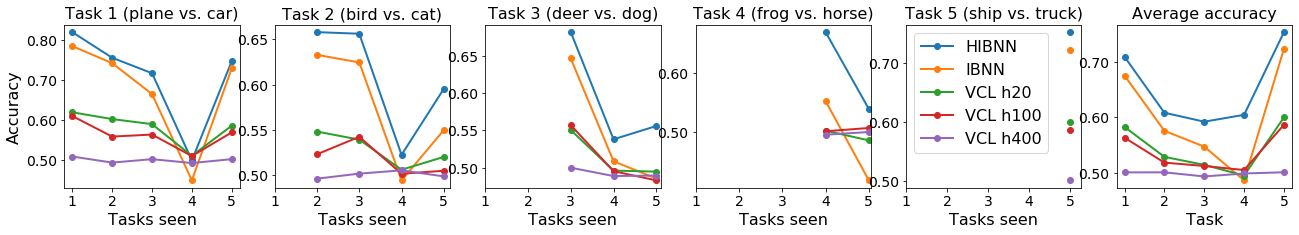

In [178]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc_rs[:, i]))+1, _hibp_acc_rs[:, i], label='HIBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_hibp_acc_rs[:, i]))+1, _hibp_acc[:, i], label='HIBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h20[:, i]))+1, _vcl_result_h20[:, i], label='VCL h20', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc_rs))+1, __hibp_acc_rs, label='HIBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
#ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='HIBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result_h20))+1, __vcl_result_h20, label='VCL 20', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result_h100))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result_h400))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_hibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_hibp_cifar_sh_l2.pdf", bbox_inches='tight')
fig.show()

In [159]:
print("Overall accuracies H-IBP: {0} pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies H-IBP RS: {0} pm {1}".format(np.nanmean(hibp_acc_rs), np.nanmean(np.nanstd(hibp_acc_rs, 0))))
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies H-IBP: 0.6156190234973716 pm 0.03565493280066836
Overall accuracies H-IBP RS: 0.6475154943081239 pm 0.021121785703767496
Overall accuracies IBP: 0.6008442185229311 pm 0.0264965128243902
Overall accuracies VCL h20: 0.5437859750787417 pm 0.060856223813306395
Overall accuracies VCL h100: 0.534593644188717 pm 0.05776960738428884
Overall accuracies VCL h400: 0.4987541646510363 pm 0.007948331895543195


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [173]:
Z_hibp = d_bl['Z']
len(Z_hibp)

5

In [174]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp[i][j])
    _Z_hibp.append(tmp)

In [175]:
__Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp[0].shape

(5, 2000, 200)

In [168]:
Z_hibp_rs = d_rs['Z']
len(Z_hibp_rs)

5

In [169]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_hibp_rs = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp_rs[i][j])
    _Z_hibp_rs.append(tmp)

In [170]:
__Z_hibp_rs = [np.concatenate(_Z_hibp_rs[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp_rs[0].shape

(5, 2000, 200)

In [ ]:
Z_ibp = d_ibp['Z']
len(Z_ibp)

In [145]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [146]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2000, 200)

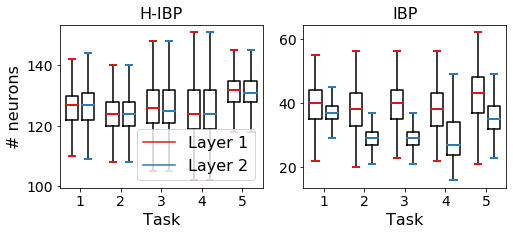

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpl = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp_rs[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp_rs[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
ax[0].plot([], c='#D7191C', label='Layer 1')
ax[0].plot([], c='#2C7BB6', label='Layer 2')
ax[0].legend(fontsize=legend_size)

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
#ax[0].set_yticks(range(40, 90, 10))
#ax[1].set_yticks(range(20, 70, 10))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
ax[0].set_title('H-IBP', fontsize=legend_size)
ax[1].set_title('IBP', fontsize=legend_size)
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.savefig('plots/Zs_bp_cifar_hibp_ibp_l2_sh.pdf', bbox_inches='tight')
plt.show()